<a href="https://colab.research.google.com/github/MkRakesh/Forecasting/blob/main/Copy_of_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.8 MB/s e

In [ ]:
import pycaret
from pycaret.datasets import get_data

In [ ]:
# pip show scipy

In [ ]:
'''load Airline data'''

import pandas as pd
data = pd.read_excel('Airlines+Data.xlsx')
data.set_index('Month',inplace=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [ ]:
# '''Import Time Series libraries'''

from pycaret.time_series import *
s = setup(data, fh = 3, fold = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(96, 1)"
5,Transformed data shape,"(96, 1)"
6,Transformed train set shape,"(93, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
'''Import Time Series Experiment'''

from pycaret.time_series import TSForecastingExperiment
s = TSForecastingExperiment()

In [ ]:
'''Compare models using Functional API'''
best = compare_models()

# '''OPP API'''
# best = s.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.2794,0.2978,7.3330,8.8098,0.0218,0.0222,0.7958,1.2420
ets,ETS,0.2794,0.2978,7.3339,8.8107,0.0218,0.0222,0.7958,0.1820
theta,Theta Forecaster,0.3071,0.3299,8.2000,9.8939,0.0242,0.0248,0.7673,0.0420
stlf,STLF,0.3417,0.3444,8.8651,10.1016,0.0267,0.0272,0.7228,0.0560
arima,ARIMA,0.3531,0.3606,9.1970,10.6414,0.0280,0.0286,0.7257,0.1120
auto_arima,Auto ARIMA,0.3807,0.3810,9.8635,11.1734,0.0304,0.0310,0.6590,5.6740
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6821,0.6927,18.0392,20.6761,0.0533,0.0548,0.0968,0.1340
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8008,0.7853,21.1612,23.4192,0.0632,0.0657,-0.1962,0.1400
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8008,0.7853,21.1615,23.4192,0.0632,0.0657,-0.1962,0.1400
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8081,0.7938,21.3586,23.6717,0.0638,0.0663,-0.2230,0.1660


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
'''Plot forecasting using functional API'''
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})

# OOP API
# s.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})

In [ ]:
'''Diagnose best model using functional API'''
plot_model(best, plot = 'diagnostics')

# OOP API
# s.plot_model(best, plot = 'diagnostics')

In [ ]:
'''Insample plot using functional API'''
plot_model(best, plot = 'insample')

# OOP API
# s.plot_model(best, plot = 'insample')

In [ ]:
'''Forecast using functional API'''
finalModel = finalize_model(best)
forecast = predict_model(best, fh = 24)
forecast

# OOP API
# final_best = s.finalize_model(best)
# s.predict_model(best, fh = 24)

,y_pred
2002-10,313.1308
2002-11,272.6777
2002-12,311.0925
2003-01,317.3489
2003-02,312.4507
2003-03,360.3710
2003-04,350.3723
2003-05,350.1982
2003-06,397.4865
2003-07,441.9840


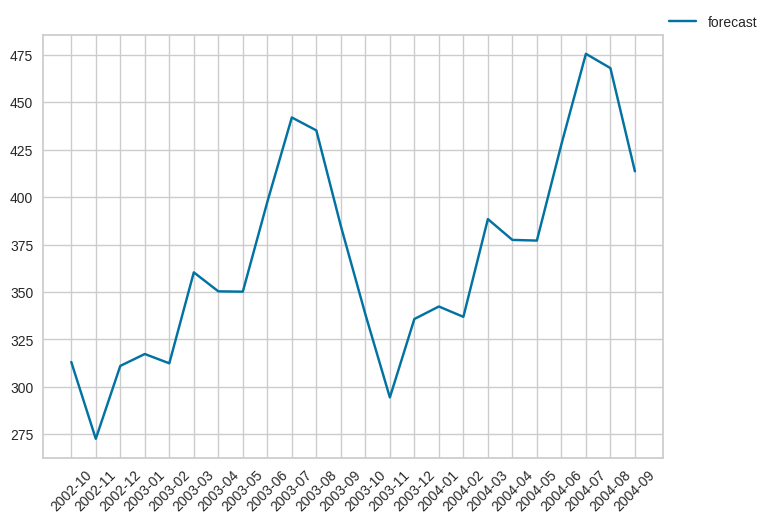

In [ ]:
'''Plot forecast'''

import matplotlib.pyplot as plt
plt.plot(forecast.index.strftime('%Y-%m'), forecast['y_pred'].astype(float),label = 'forecast')
plt.legend(loc=[1,1])
plt.xticks(rotation=45);

In [ ]:
'''Save model using functional API'''
save_model(finalModel, 'bestModel')

# OOP API
# s.save_model(final_best, 'my_final_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 ExponentialSmoothing(seasonal='mul',
                                                                                                                                                      sp=12,
                                                                                                                                                      trend='add'))]))]))]))]),
 'bestModel.pkl')

In [ ]:
'''Load saved model using functional API'''
loaded_model = load_model('bestModel')
print(loaded_model)

# OOP API
# loaded_model = s.load_model('my_final_best_model')
# print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ForecastingPipeline(steps=[('forecaster',
                                                                                            TransformedTargetForecaster(steps=[('model',
                                                                                                                                ExponentialSmoothing(seasonal='mul',
                                                                                                                                                     sp=12,
                                                                                                                                                     trend='add'))]))]))]))])


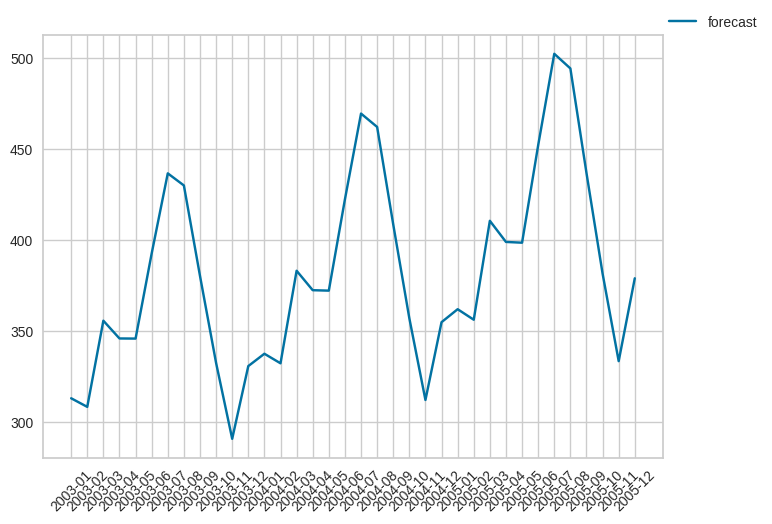

In [ ]:
'''forecast using loaded model'''

forecast1 = predict_model(loaded_model, fh = 36)
plt.plot(forecast1.index.strftime('%Y-%m'), forecast1['y_pred'].astype(float),label = 'forecast')
plt.legend(loc=[1,1])
plt.xticks(rotation=45);
